In [ ]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import matplotlib.patches as mpatches



In [ ]:
#############   V1版本


# 定义常量
MAX_DEPTH_VALUE = 2 ** 16  # 2的16次幂

def read_coco_annotations(json_file):
    with open(json_file, 'r') as f:
        annotations = json.load(f)
    return annotations

def calculate_center(bbox):
    x, y, w, h = bbox
    center_x = x + w / 2
    center_y = y + h / 2
    return int(center_x), int(center_y)

def get_depth_from_image(depth_image, center_point):
    x, y = center_point
    return depth_image[y, x]

def plot_scatter(depths, log_sizes, title, x_title, y_title):
    plt.scatter(depths, log_sizes, alpha=0.5)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    plt.show()

def main(annotation_file, depth_image_dir, sample_size=100):
    annotations = read_coco_annotations(annotation_file)
    
    # 获取 image_info 列表
    image_info_list = annotations['images']
    
    # 随机抽样 image_info 条目
    sampled_images = random.sample(image_info_list, min(sample_size, len(image_info_list)))
    
    sizes = []
    depths = []
    
    # 处理每个抽样的图像
    for image_info in sampled_images:
        image_id = image_info['id']
        image_filename = os.path.basename(image_info['file_name'])
        depth_image_path = os.path.join(depth_image_dir, image_filename.replace('.jpg', '.png'))
        
        # 检查深度图像路径是否存在
        if not os.path.exists(depth_image_path):
            continue
        
        # 打开深度图像
        depth_image = np.array(Image.open(depth_image_path), dtype=np.float32)
        
        for ann in annotations['annotations']:
            if ann['image_id'] == image_id:
                bbox = ann['bbox']
                center = calculate_center(bbox)
                depth_value = get_depth_from_image(depth_image, center)
                
                # 进行归一化
                normalized_depth_value = depth_value / MAX_DEPTH_VALUE
                
                # 确保深度值有效
                if np.isnan(normalized_depth_value) or normalized_depth_value < 0 or normalized_depth_value > 1:
                    continue
                
                # 计算目标的尺寸
                x, y, w, h = bbox
                size = w * h  # 目标的尺寸（单位为目标占据的像素）
                
                # 进行对数运算
                log_size = np.log(size + 1)  # 加1以避免对0取对数
                
                depths.append(normalized_depth_value)
                sizes.append(log_size)

    # 确保有有效的数据用于绘制散点图
    if sizes and depths:
        # 绘制散点图
        plot_scatter(depths, sizes, title='Size vs Depth Scatter Plot', 
                     x_title='Relative Depth', y_title='Log(Target Size (pixels))')
    else:
        print("No valid data to plot.")

In [ ]:
# 定义常量
MAX_DEPTH_VALUE = 2 ** 16  # 2的16次幂

def read_coco_annotations(json_file):
    with open(json_file, 'r') as f:
        annotations = json.load(f)
    return annotations

def calculate_center(bbox):
    x, y, w, h = bbox
    center_x = x + w / 2
    center_y = y + h / 2
    return int(center_x), int(center_y)

def get_depth_from_image(depth_image, center_point):
    x, y = center_point
    return depth_image[y, x]

def plot_scatter(depths, log_sizes, categories, category_colors, title, x_title, y_title):
    plt.figure(figsize=(10, 6))  # 设置图表尺寸(10英寸x6英寸)

    unique_categories = list(set(categories))
    for category in unique_categories:
        cate_depths = [depths[i] for i in range(len(depths)) if categories[i] == category]
        cate_sizes = [log_sizes[i] for i in range(len(log_sizes)) if categories[i] == category]
        color = [c/255.0 for c in category_colors[category]]  # 转换颜色值为0-1之间
        plt.scatter(cate_depths, cate_sizes, alpha=0.5, label=category, color=color)
    
    plt.xlabel(x_title, fontsize=14)
    plt.ylabel(y_title, fontsize=14)
    plt.title(title, fontsize=16)
    plt.legend(title='Category', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def main(annotation_file, depth_image_dir, category_colors, sample_size=100):
    annotations = read_coco_annotations(annotation_file)
    
    # 获取 image_info 列表
    image_info_list = annotations['images']
    
    # 随机抽样 image_info 条目
    sampled_images = random.sample(image_info_list, min(sample_size, len(image_info_list)))
    
    sizes = []
    depths = []
    categories = []
    
    # 处理每个抽样的图像
    for image_info in sampled_images:
        image_id = image_info['id']
        image_filename = os.path.basename(image_info['file_name'])
        depth_image_path = os.path.join(depth_image_dir, image_filename.replace('.jpg', '.png'))
        
        # 检查深度图像路径是否存在
        if not os.path.exists(depth_image_path):
            continue
        
        # 打开深度图像
        depth_image = np.array(Image.open(depth_image_path), dtype=np.float32)
        
        for ann in annotations['annotations']:
            if ann['image_id'] == image_id:
                bbox = ann['bbox']
                category_id = ann['category_id']
                category_name = [cat['name'] for cat in annotations['categories'] if cat['id'] == category_id][0]
                center = calculate_center(bbox)
                depth_value = get_depth_from_image(depth_image, center)
                
                # 进行归一化
                normalized_depth_value = depth_value / MAX_DEPTH_VALUE
                
                # 确保深度值有效
                if np.isnan(normalized_depth_value) or normalized_depth_value < 0 or normalized_depth_value > 1:
                    continue
                
                # 计算目标的尺寸
                x, y, w, h = bbox
                size = w * h  # 目标的尺寸（单位为目标占据的像素）
                
                # 进行对数运算
                log_size = np.log(size + 1)  # 加1以避免对0取对数
                
                depths.append(normalized_depth_value)
                sizes.append(log_size)
                categories.append(category_name)

    # 确保有有效的数据用于绘制散点图
    if sizes and depths:
        # 绘制散点图
        plot_scatter(depths, sizes, categories, category_colors,
                     title='Target Size vs Relative Depth Scatter Plot', 
                     x_title='Relative Depth', y_title='Log(Target Size (pixels))')
    else:
        print("No valid data to plot.")

In [ ]:
if __name__ == "__main__":
    annotation_file = "/opt/data/private/fcf/mmdetection/data/HazyDet-365k/train/train_coco.json"
    depth_image_dir = "/opt/data/private/fcf/mmdetection/data/HazyDetdevkit/HazyDet/depth_images"
    main(annotation_file, depth_image_dir, sample_size=1000)

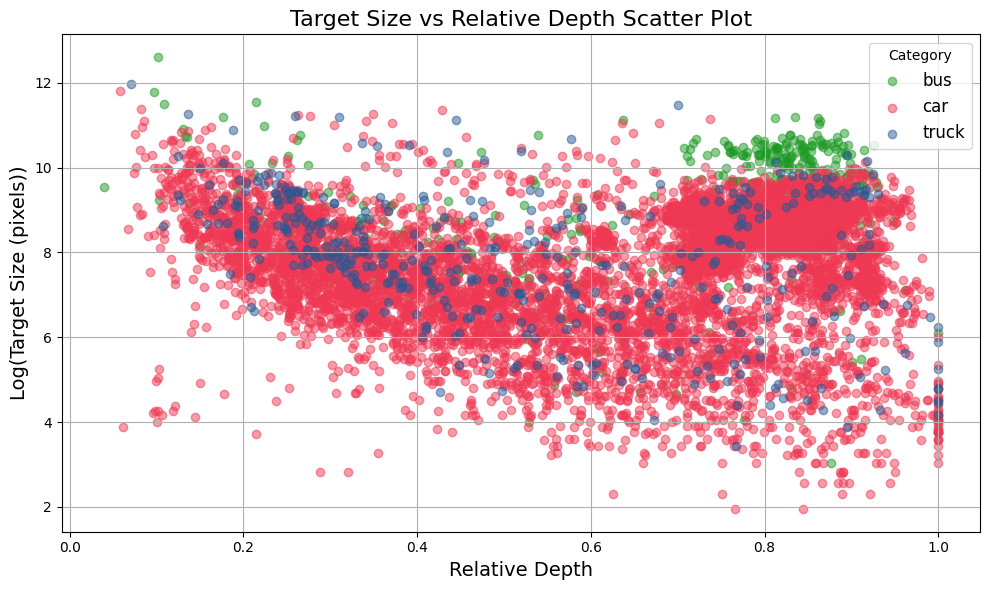

In [8]:
if __name__ == "__main__":
    annotation_file = "/opt/data/private/fcf/mmdetection/data/HazyDet-365k/train/train_coco.json"
    depth_image_dir = "/opt/data/private/fcf/mmdetection/data/HazyDetdevkit/HazyDet/depth_images"
    
    # 定义每个类别的颜色 (RGB格式)
    category_colors = {
        'car': (239,56, 83),          #
        'bus': (28, 153, 35),        #
        'truck': (38, 88, 147)   # 

        # ... 其他类别
    }
    main(annotation_file, depth_image_dir, category_colors, sample_size=300)